In [1]:
import torch

print("CUDA disponibile:", torch.cuda.is_available())
print("Versione PyTorch:", torch.__version__)
print("Versione CUDA in PyTorch:", torch.version.cuda)

CUDA disponibile: True
Versione PyTorch: 2.5.1+cu121
Versione CUDA in PyTorch: 12.1


In [1]:
import os
from PIL import Image
import numpy as np
import pandas as pd
from tqdm import tqdm
from vision_embeddings import VisionEmbeddings

def load_images_from_folder(folder):
    images = []
    filenames = []
    for filename in os.listdir(folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            path = os.path.join(folder, filename)
            try:
                img = Image.open(path).convert("RGB")
                images.append(img)
                filenames.append(filename)
            except Exception as e:
                print(f"Errore con immagine {filename}: {e}")
    return images, filenames

def main():
    folders = [
        "./dataverse_files/ISIC2018_Task3_Test_Images"
    ]

    metadata_path = "./dataverse_files/ISIC2018_Task3_Test_GroundTruth.csv"
    metadata = pd.read_csv(metadata_path)
    image_to_label = dict(zip(metadata["image_id"], metadata["dx"]))

    embedder = VisionEmbeddings(device='cpu')

    dataset_rows = []

    for folder in folders:
        print(f"\nProcessing folder: {folder}")
        images, filenames = load_images_from_folder(folder)

        for img, fname in tqdm(zip(images, filenames), total=len(images)):
            image_id = os.path.splitext(fname)[0]
            label = image_to_label.get(image_id)
            if label is None:
                print(f"Label mancante per: {image_id}, saltato.")
                continue

            features = embedder.extract(img).flatten()
            row = list(features) + [fname, label]
            dataset_rows.append(row)

    num_features = len(dataset_rows[0]) - 2
    columns = [f"feature_{i}" for i in range(num_features)] + ["filename", "label"]
    df = pd.DataFrame(dataset_rows, columns=columns)

    df.to_csv("features_skin_lesion_test.csv", index=False)
    print("\nDataset salvato in: features_skin_lesion_test.csv")

if __name__ == "__main__":
    main()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Processing folder: ./dataverse_files/ISIC2018_Task3_Test_Images


100%|██████████| 1511/1511 [01:58<00:00, 12.73it/s]



Dataset salvato in: features_skin_lesion_test.csv


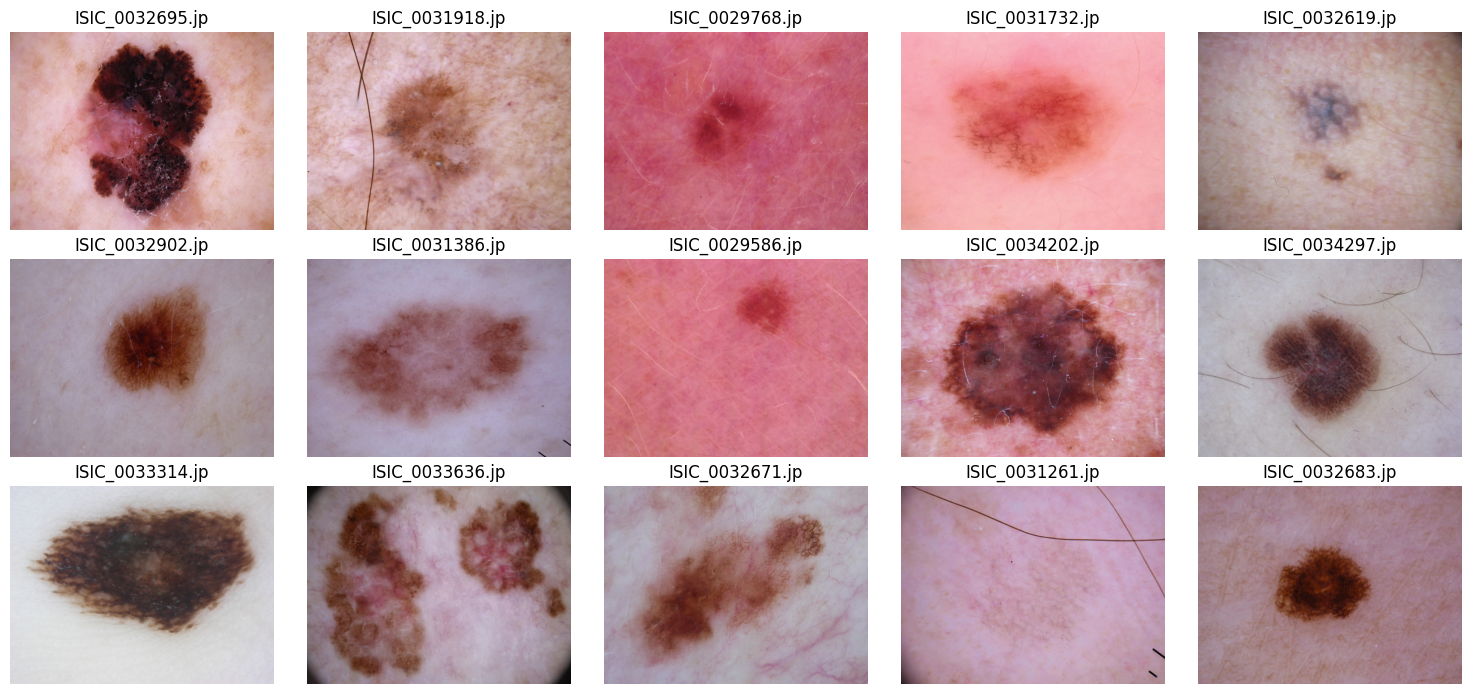

In [50]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

image_dir = './dataverse_files/HAM10000_images_part_2'

image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]

selected_images = random.sample(image_files, 15)

plt.figure(figsize=(15, 7))
for i, image_file in enumerate(selected_images):
    img_path = os.path.join(image_dir, image_file)
    img = Image.open(img_path)

    plt.subplot(3, 5, i + 1)
    plt.imshow(img)
    plt.title(image_file[:15])
    plt.axis('off')

plt.tight_layout()
plt.show()
